In [ ]:
import pandas as pd
train_data_origin = pd.read_csv("../data/app_time_prediction.csv").sort_values('submit_time',na_position='first')
train_data_origin.head(10)

In [ ]:
train_data=train_data_origin

In [742]:
train_data['time'] = pd.to_datetime(train_data.submit_time,unit='ms')
train_data['hour'] = pd.DatetimeIndex(train_data.time).hour

In [743]:
#将用户，队列放入一个列表中
user_list=train_data["user"].unique()
queue_list=train_data["queue"].unique()

In [744]:
#构造user表
user_table=pd.DataFrame(user_list,columns=["user_name"])
user_table["user_id"]=user_table.index
user_table.head()

,user_name,user_id
0,hadoop-search,0
1,hadoop-dqc,1
2,hadoop-mobile,2
3,hadoop-query,3
4,hadoop-dataapp,4


In [745]:
#构造queue表
queue_table=pd.DataFrame(queue_list,columns=["queue_name"])
queue_table["queue_id"]=queue_table.index
queue_table.head()

,queue_name,queue_id
0,root.hadoop-search.model,0
1,root.hadoop-dwplat.dqc,1
2,root.hadoop-search.rank,2
3,root.rz.hadoop-mobile.hadoop_mobile_server,3
4,root.hadoop-search.offline,4


In [746]:
merged1 = train_data.merge(user_table,how='inner',left_on='user',right_on='user_name',left_index=True)
merged1.head()

,user,queue,container_num,allocated_vcores,allocated_memory,submit_time,start_time,elapsed_time,time,hour,user_name,user_id
0,hadoop-search,root.hadoop-search.model,168,168,387328,1503261892306,1503261924058,75402524,2017-08-20 20:44:52.306,20,hadoop-search,0
0,hadoop-search,root.hadoop-search.rank,16227,16227,37387264,1503277659384,1503277692157,60186311,2017-08-21 01:07:39.384,1,hadoop-search,0
0,hadoop-search,root.hadoop-search.offline,678,678,1562368,1503287663297,1503287805323,53500321,2017-08-21 03:54:23.297,3,hadoop-search,0
0,hadoop-search,root.rz.hadoop-search.etl,159,159,366592,1503331513321,1503331521565,211174,2017-08-21 16:05:13.321,16,hadoop-search,0
0,hadoop-search,root.rz.hadoop-search.etl,2,2,4864,1503332232792,1503332243381,9095,2017-08-21 16:17:12.792,16,hadoop-search,0


In [747]:
user_table[user_table['user_name']=='hadoop-search']

,user_name,user_id
0,hadoop-search,0


In [748]:
merged2 = pd.merge(merged1,queue_table,how='inner',left_on='queue',right_on='queue_name')

In [749]:
merged2.head()

,user,queue,container_num,allocated_vcores,allocated_memory,submit_time,start_time,elapsed_time,time,hour,user_name,user_id,queue_name,queue_id
0,hadoop-search,root.hadoop-search.model,168,168,387328,1503261892306,1503261924058,75402524,2017-08-20 20:44:52.306,20,hadoop-search,0,root.hadoop-search.model,0
1,hadoop-search,root.hadoop-search.model,369,369,850432,1503336869331,1503360101694,1194378,2017-08-21 17:34:29.331,17,hadoop-search,0,root.hadoop-search.model,0
2,hadoop-search,root.hadoop-search.model,2014,2014,4640512,1503345020208,1503360118589,1408527,2017-08-21 19:50:20.208,19,hadoop-search,0,root.hadoop-search.model,0
3,hadoop-search,root.hadoop-search.model,2044,2044,4709632,1503345022619,1503360105692,1710030,2017-08-21 19:50:22.619,19,hadoop-search,0,root.hadoop-search.model,0
4,hadoop-search,root.hadoop-search.model,402,402,926464,1503345053718,1503360109735,956091,2017-08-21 19:50:53.718,19,hadoop-search,0,root.hadoop-search.model,0


In [750]:
merged_data = merged2[["elapsed_time","container_num","allocated_vcores","allocated_memory","submit_time","time","hour","user_id","queue_id"]]

In [751]:
merged_data.head()

,elapsed_time,container_num,allocated_vcores,allocated_memory,submit_time,time,hour,user_id,queue_id
0,75402524,168,168,387328,1503261892306,2017-08-20 20:44:52.306,20,0,0
1,1194378,369,369,850432,1503336869331,2017-08-21 17:34:29.331,17,0,0
2,1408527,2014,2014,4640512,1503345020208,2017-08-21 19:50:20.208,19,0,0
3,1710030,2044,2044,4709632,1503345022619,2017-08-21 19:50:22.619,19,0,0
4,956091,402,402,926464,1503345053718,2017-08-21 19:50:53.718,19,0,0


In [752]:
order_by_submit_time=merged_data.sort_values('time')

In [753]:
tmp2=order_by_submit_time

In [754]:
tmp2['allocated_vcores']=(tmp2['allocated_vcores']/tmp2['container_num']).astype('int')
tmp2['allocated_memory']=(tmp2['allocated_memory']/tmp2['container_num']).astype('int')

In [755]:
tmp2['allocated_memory']=(tmp2['allocated_memory']/1024).astype('int')
tmp2['submit_time']=(tmp2['submit_time']/1000).astype('int')

In [756]:
import time
zero = "2017-08-22 08:00:00"
timeArray = time.strptime(zero, "%Y-%m-%d %H:%M:%S")
timeStamp = int(time.mktime(timeArray))
tmp2['submit_time']=tmp2['submit_time']-timeStamp
tmp2=tmp2[tmp2['submit_time']>0]

In [757]:
tmp2.head()

,elapsed_time,container_num,allocated_vcores,allocated_memory,submit_time,time,hour,user_id,queue_id
438683,115102,573,1,2,1,2017-08-22 00:00:01.009,0,28,52
164844,36574,3,1,2,1,2017-08-22 00:00:01.094,0,6,9
428892,587910,9,1,5,1,2017-08-22 00:00:01.821,0,26,49
428893,205809,4,1,2,1,2017-08-22 00:00:01.889,0,26,49
164845,27791,2,1,2,1,2017-08-22 00:00:01.974,0,6,9


In [758]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [759]:
#_ = sns.pairplot(tmp2[['elapsed_time','container_num']])

In [760]:
tmp2 = tmp2.drop(['time'],axis = 1)

In [761]:
tmp2['elapsed_time'].max()

33830476

In [762]:
#均值
tmp2['elapsed_time'].mean()

224193.96696377906

In [763]:
#中位数
tmp2['elapsed_time'].median()

53340.5

In [764]:
#查看分位数
tmp2['elapsed_time'].quantile(0.95)

789754.25

In [765]:
df_train = tmp2[tmp2['elapsed_time']<tmp2['elapsed_time'].quantile(0.95)]
print(df_train.shape)

(298001, 8)


In [766]:
from sklearn import model_selection

def try_model_1d(clf,size):
    if size is not None:
        x=df_train['container_num'].sample(n=size).values
        y=df_train['elapsed_time'].sample(n=size).values
    else:
        x=df_train['container_num'].values
        y=df_train['elapsed_time'].values
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=0)
    x_train=x_train.reshape(-1,1)
    x_test=x_test.reshape(-1,1)
    y_train=y_train.reshape(-1,1)
    y_test=y_test.reshape(-1,1)
    clf.fit(x_train,y_train)
    train_score = clf.score(x_train,y_train)
    test_score = clf.score(x_test, y_test)
    result = clf.predict(x_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('train score %f,test score: %f'%(train_score,test_score))
    plt.legend()
    plt.show()


#from sklearn.metrics import explained_variance_score

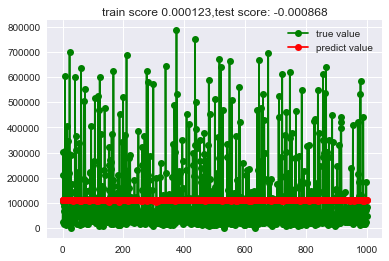

In [767]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression(normalize=True,n_jobs=4)
try_model_1d(linear_reg,5000)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


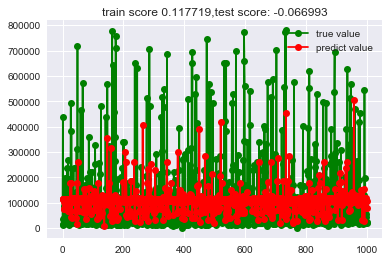

In [768]:
rf_reg = RandomForestRegressor(n_estimators = 100)
try_model_1d(rf_reg,5000)

In [769]:
def try_model_nd(clf,size):
    if size is not None:
        x=df_train.drop(['elapsed_time'],axis = 1).sample(n=size).values
        y=df_train['elapsed_time'].sample(n=size).values
    else:
        x=df_train.drop(['elapsed_time'],axis = 1).values
        y=df_train['elapsed_time'].values
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=30)
    y_train=y_train.reshape(-1,1)
    y_test=y_test.reshape(-1,1)
    clf.fit(x_train,y_train)
    train_score = clf.score(x_train,y_train)
    test_score = clf.score(x_test, y_test)
    result = clf.predict(x_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('train score %f,test score: %f'%(train_score,test_score))
    plt.legend()
    plt.show()

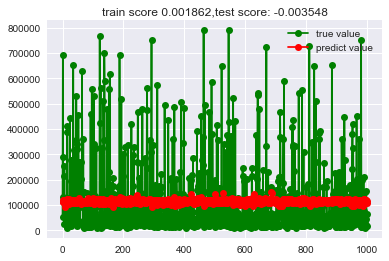

In [770]:
try_model_nd(linear_reg,5000)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


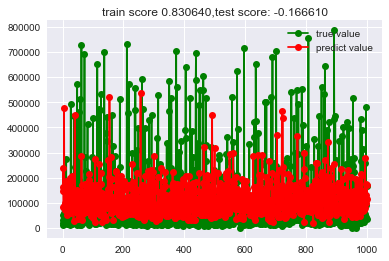

In [771]:
try_model_nd(rf_reg,5000)

In [772]:
def try_model_nd_minu(clf,size):
    df_train['elapsed_time_minu']=(df_train['elapsed_time']/60).astype('int')
    if size is not None:
        x=df_train.drop(['elapsed_time_minu','elapsed_time'],axis = 1).sample(n=size).values
        y=df_train['elapsed_time_minu'].sample(n=size).values
    else:
        x=df_train.drop(['elapsed_time_minu','elapsed_time'],axis = 1).values
        y=df_train['elapsed_time_minu'].values
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=30)
    clf.fit(x_train,y_train)
    train_score = clf.score(x_train,y_train)
    test_score = clf.score(x_test, y_test)
    result = clf.predict(x_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('train score %f,test score: %f'%(train_score,test_score))
    plt.legend()
    plt.show()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


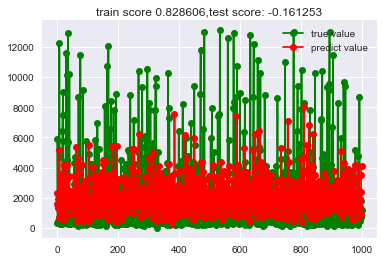

In [773]:
try_model_nd_minu(rf_reg,5000)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


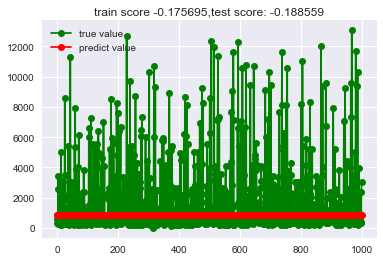

In [774]:
from sklearn import svm
svr = svm.SVR()
try_model_nd_minu(svr,5000)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


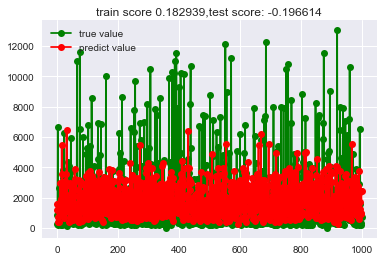

In [775]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()
try_model_nd_minu(knn,5000)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


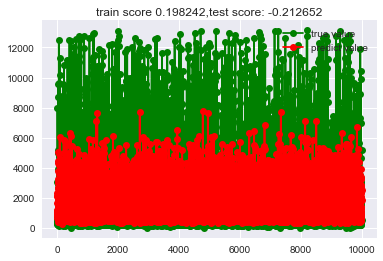

In [776]:
try_model_nd_minu(knn,50000)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


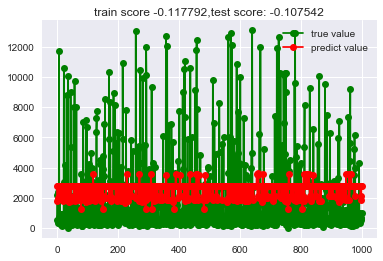

In [777]:
from sklearn import ensemble
ada = ensemble.AdaBoostRegressor(n_estimators=100)
try_model_nd_minu(ada,5000)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


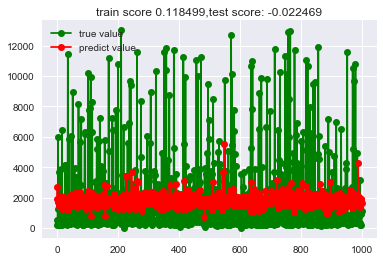

In [778]:
gbrt = ensemble.GradientBoostingRegressor(n_estimators=100)
try_model_nd_minu(gbrt,5000)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


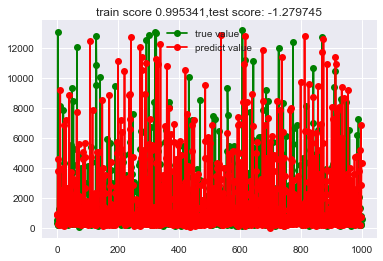

In [779]:
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor()
try_model_nd_minu(tree_reg,5000)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


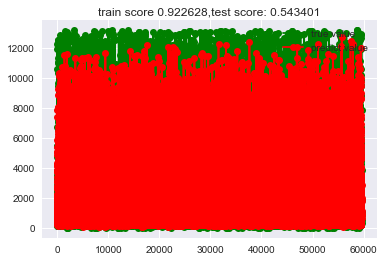

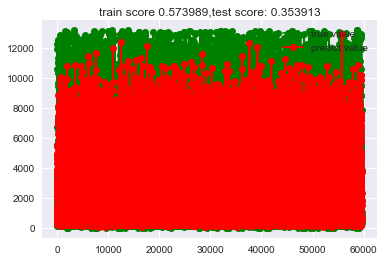

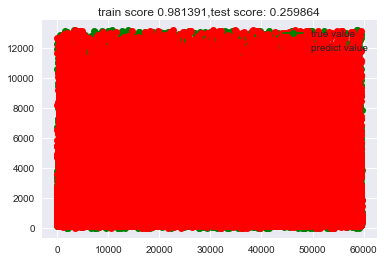

In [780]:
try_model_nd_minu(rf_reg,None)
try_model_nd_minu(knn,None)
try_model_nd_minu(tree_reg,None)